In [130]:
import networkx as nx
import matplotlib.pyplot as plt

In [131]:
import numpy as np

# Read the content of 'data.txt' into a NumPy array
with open('data.txt', 'r') as file:
    lines = file.read().splitlines()
data = [list(map(int, line.split())) for line in lines]
adjacency_matrix = np.array(data)

print(adjacency_matrix.shape)


(26, 26)


In [132]:
for i in range(0,26):
    for j in range(0,26):
        if adjacency_matrix[i][j] == 9:
            adjacency_matrix[i][j] = 0
    adjacency_matrix[i][i] = 0     

In [133]:
symmetric_matrix = adjacency_matrix * adjacency_matrix.T
print(symmetric_matrix)
#print(symmetric_matrix.diagonal())

[[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 

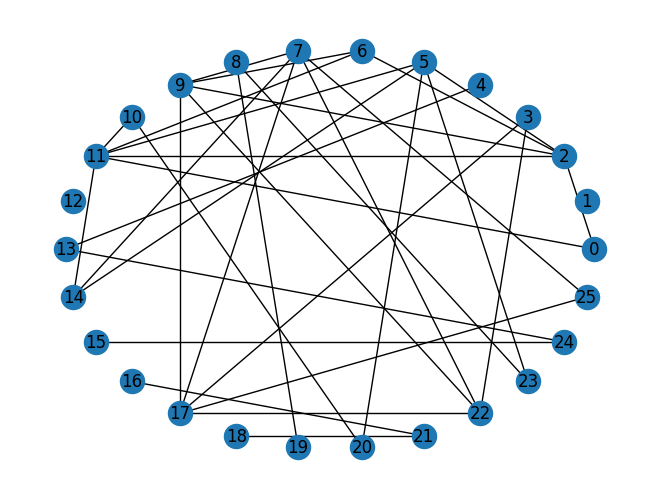

In [134]:
# Save the modified adjacency matrix to a new file
G = nx.from_numpy_array(symmetric_matrix)

nx.draw_circular(G, with_labels = True)

In [135]:
G.edges(data=True)
print( nx.shortest_path( G, 7, 6 ) )
#print( nx.diameter( G ) ) 

[7, 9, 6]


In [171]:
# Read the attributes from an input file
input_file = "demographics.txt"
node_id = 0

node_attributes = []

with open(input_file, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 6:
            sex, age, ethnicity, religion, alcohol, delinquency = int(parts[0]), int(parts[1]), int(parts[2]), int(parts[3]), int(parts[4]), int(parts[5])
            node_attributes.append({'sex': sex, 'age': age, 'ethnicity': ethnicity, 'religion': religion, 'alcohol': alcohol, 'delinquency': delinquency})

# Set the attributes for nodes in the graph
node_ids = list(G.nodes)  # Assuming node IDs correspond to node order in the input file

for i, node_id in enumerate(node_ids):
    attributes = node_attributes[i]
    nx.set_node_attributes(G, {node_id: attributes})

# Example: Print attributes for a specific node (e.g., node with ID 1)
node_id = 9
attributes = G.nodes[node_id]
print(attributes)
print(f"Node {node_id} attributes - Sex: {attributes['sex']}, Age: {attributes['age']}, Ethnicity: {attributes['ethnicity']}, Religion: {attributes['religion']}, Alcohol: {attributes['alcohol']}, Delinquency: {attributes['delinquency']}")

{'sex': 1, 'age': 12, 'ethnicity': 1, 'religion': 1, 'alcohol': 2, 'delinquency': 2}
Node 9 attributes - Sex: 1, Age: 12, Ethnicity: 1, Religion: 1, Alcohol: 2, Delinquency: 2


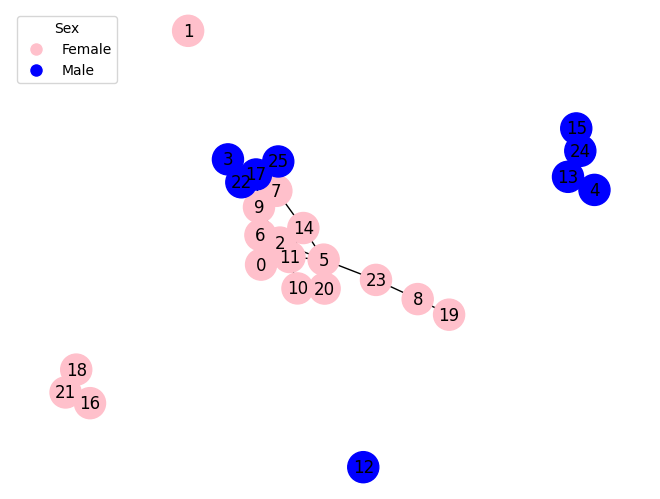

In [ ]:
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'pink', 2: 'blue'}
color_legend = {1: 'Female', 2: 'Male'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[G.nodes[node]['sex']] for node in G.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(G)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Sex', loc='upper left')

plt.show()

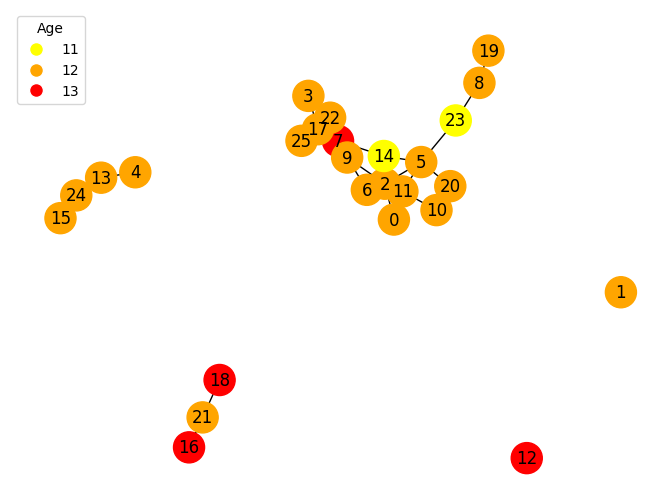

In [182]:
# Create a mapping of 'age' attribute values to colors
color_map = {11: 'yellow', 12: 'orange', 13: 'red'}
color_legend = {11: '11', 12: '12', 13: '13'}

# Extract the 'age' attribute for each node and assign a color based on the attribute
node_colors = [color_map[G.nodes[node]['age']] for node in G.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(G)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Age', loc='upper left')

plt.show()

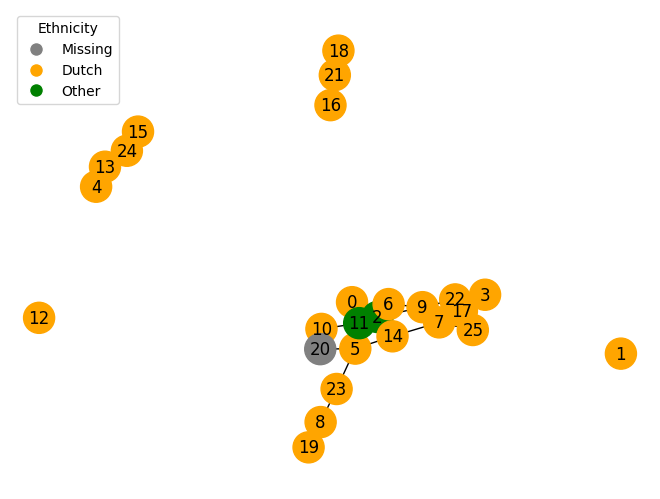

In [ ]:
# Create a mapping of 'ethnicity' attribute values to colors
color_map = {0: 'gray', 1: 'orange', 2: 'green'}
color_legend = {0: 'Missing', 1: 'Dutch', 2: 'Other'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[G.nodes[node]['ethnicity']] for node in G.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(G)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Ethnicity', loc='upper left')

plt.show()

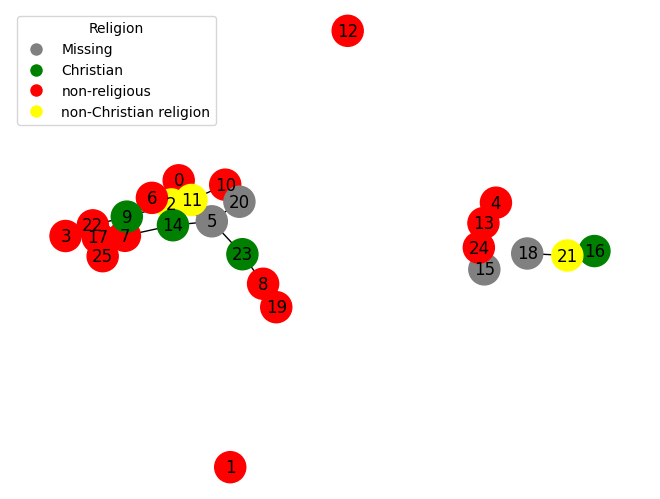

In [139]:
# Create a mapping of 'religion' attribute values to colors
color_map = {0: 'gray', 1: 'green', 2: 'red', 3: 'yellow'}
color_legend = {0: 'Missing', 1: 'Christian', 2: 'non-religious', 3: 'non-Christian religion'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[G.nodes[node]['religion']] for node in G.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(G)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Religion', loc='upper left')

plt.show()

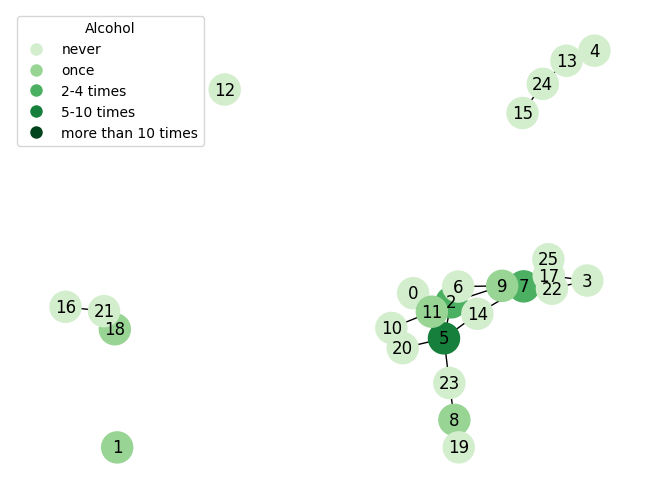

In [159]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

cmap = plt.get_cmap('Greens')
norm = Normalize(vmin=0, vmax=5)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create a mapping of 'alcohol' attribute values to colors
color_legend = { 1: 'never', 2: 'once', 3: '2-4 times', 4 : '5-10 times', 5 : 'more than 10 times'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [cmap(norm(G.nodes[node]['alcohol'])) for node in G.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(G)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(legend_labels[label])), markersize=10, label=label) for label in color_legend.values()]

plt.legend(handles=legend_handles, title='Alcohol', loc='upper left')

plt.show()

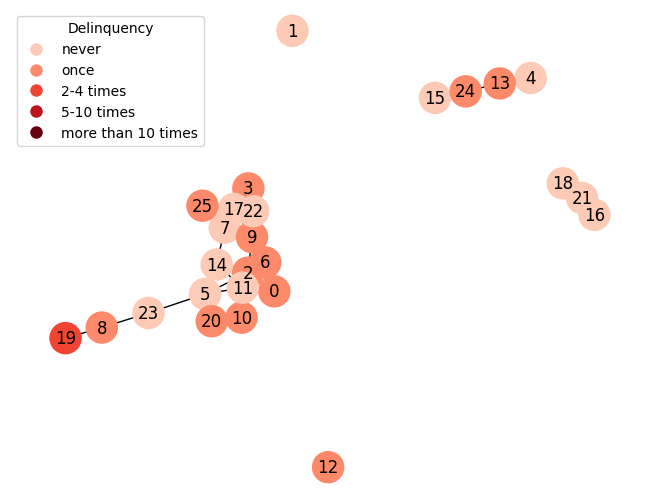

In [163]:
cmap = plt.get_cmap('Reds')
norm = Normalize(vmin=0, vmax=5)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create a mapping of 'alcohol' attribute values to colors
color_legend = { 1: 'never', 2: 'once', 3: '2-4 times', 4 : '5-10 times', 5 : 'more than 10 times'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [cmap(norm(G.nodes[node]['delinquency'])) for node in G.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(G)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(legend_labels[label])), markersize=10, label=label) for label in color_legend.values()]

plt.legend(handles=legend_handles, title='Delinquency', loc='upper left')

plt.show()

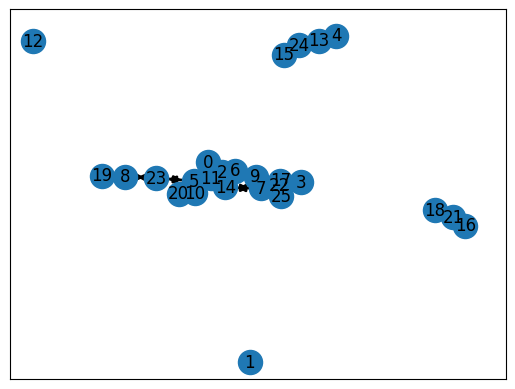

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

# from graph to matrix
m = nx.adjacency_matrix( G ).toarray() # the ndarray version of the matrix

#print( m )

# transpose
m_t = m.transpose()

#print( m_t )

# generic matrix combination operation
def combine( m1, m2, op ):
    assert( np.shape( m1 ) == np.shape( m2 ) )
    dim = np.shape( m1 )
    if ( len( dim ) == 1 ):
        res = np.array( m1 )
        for i in range( 0, dim[ 0 ] ):
            res[ i ] = op( m1[ i ], m2[ i ] )
        return res
    else:
        res = np.array( m1 )
        for i in range( 0, dim[ len( dim ) - 1 ] ):
            res[ i ] = combine( m1[ i ], m2[ i ], op )
        return res
    
SYM_UNION = (lambda x, y: x | y)     # OR
SYM_INTERSECT = (lambda x, y: x & y) # AND

# symmetrisation (via transpose)
sym_uni = combine( m, m_t, SYM_UNION )
sym_int = combine( m, m_t, SYM_INTERSECT )
#print( np.matrix( sym_uni ) )
#print( np.matrix( sym_int ) )

g_uni = nx.from_numpy_array( sym_uni, create_using=nx.DiGraph )
#nx.draw_networkx( g_uni )
g_int = nx.from_numpy_array( sym_int, create_using=nx.DiGraph )
#nx.draw_networkx( g_int )

m_sum = combine( m, m_t, (lambda x, y: x + y ) )
g_sum = nx.from_numpy_array( m_sum, create_using=nx.DiGraph )
nx.draw_networkx( g_sum, width=[ g_sum[v1][v2]['weight'] for v1,v2 in g_sum.edges() ] )


In [ ]:
# Calculate the total mean of the edges in the graph based on their presence
total_edge_count = G.number_of_edges()
total_node_count = G.number_of_nodes()

if total_node_count > 0:
    total_mean_edge_count = total_edge_count / total_node_count
else:
    total_mean_edge_count = 0

print(f"Total Mean Edge Count for the Graph: {total_mean_edge_count}")

Total Mean Edge Count for the Graph: 1.2692307692307692


In [ ]:
# Calculate the Jaccard coefficient for all pairs of nodes (measure of the similarity)
jaccard_coefficients = list(nx.jaccard_coefficient(G))

# Print the Jaccard coefficients for each pair of nodes
for u, v, coef in jaccard_coefficients:
    if coef != 0:
        print(f"Jaccard coefficient between nodes {u} and {v}: {coef}")

Jaccard coefficient between nodes 0 and 5: 0.4
Jaccard coefficient between nodes 0 and 6: 0.6666666666666666
Jaccard coefficient between nodes 0 and 9: 0.16666666666666666
Jaccard coefficient between nodes 0 and 10: 0.3333333333333333
Jaccard coefficient between nodes 0 and 14: 0.25
Jaccard coefficient between nodes 2 and 7: 0.1111111111111111
Jaccard coefficient between nodes 2 and 10: 0.16666666666666666
Jaccard coefficient between nodes 2 and 14: 0.3333333333333333
Jaccard coefficient between nodes 2 and 17: 0.1111111111111111
Jaccard coefficient between nodes 2 and 20: 0.16666666666666666
Jaccard coefficient between nodes 2 and 22: 0.125
Jaccard coefficient between nodes 2 and 23: 0.16666666666666666
Jaccard coefficient between nodes 3 and 7: 0.4
Jaccard coefficient between nodes 3 and 9: 0.4
Jaccard coefficient between nodes 3 and 25: 0.3333333333333333
Jaccard coefficient between nodes 4 and 24: 0.5
Jaccard coefficient between nodes 5 and 6: 0.3333333333333333
Jaccard coefficient

In [138]:
# Function to calculate homophily for a given attribute (e.g., 'gender')
def calculate_homophily(graph, attribute):
    same_count = 0
    total_count = 0

    for u, v in graph.edges():
        if graph.nodes[u][attribute] == graph.nodes[v][attribute]:
            same_count += 1
        total_count += 1

    if total_count > 0:
        homophily = same_count / total_count
    else:
        homophily = 0.0

    return homophily

# Calculate homophily for the 'gender' attribute
attribute_name = 'religion'
homophily_value = calculate_homophily(G, attribute_name)

print(f'Homophily for {attribute_name}: {homophily_value}')

Homophily for religion: 0.36363636363636365


{0: 0.32,
 1: 0.32,
 2: 0.64,
 3: 0.36,
 4: 0.12,
 5: 0.72,
 6: 0.4,
 7: 0.64,
 8: 0.16,
 9: 0.76,
 10: 0.36,
 11: 0.64,
 12: 0.28,
 13: 0.32,
 14: 0.32,
 15: 0.16,
 16: 0.08,
 17: 0.44,
 18: 0.12,
 19: 0.16,
 20: 0.4,
 21: 0.24,
 22: 0.36,
 23: 0.28,
 24: 0.24,
 25: 0.52}

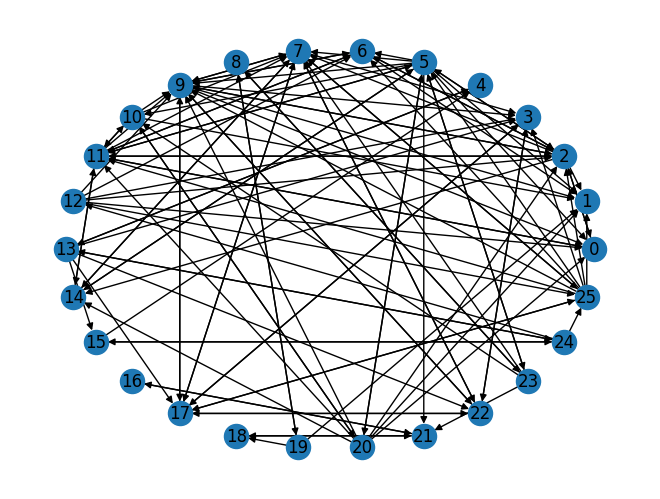

In [168]:
GG = nx.DiGraph(adjacency_matrix)
nx.draw_circular(GG, with_labels = True)

nx.degree_centrality(GG)

In [169]:
nx.in_degree_centrality(GG)

{0: 0.24,
 1: 0.32,
 2: 0.32,
 3: 0.28,
 4: 0.08,
 5: 0.24,
 6: 0.24,
 7: 0.4,
 8: 0.08,
 9: 0.44,
 10: 0.16,
 11: 0.32,
 12: 0.04,
 13: 0.08,
 14: 0.2,
 15: 0.08,
 16: 0.04,
 17: 0.24,
 18: 0.08,
 19: 0.04,
 20: 0.08,
 21: 0.16,
 22: 0.2,
 23: 0.08,
 24: 0.08,
 25: 0.16}

In [170]:
nx.out_degree_centrality(GG)

{0: 0.08,
 1: 0.0,
 2: 0.32,
 3: 0.08,
 4: 0.04,
 5: 0.48,
 6: 0.16,
 7: 0.24,
 8: 0.08,
 9: 0.32,
 10: 0.2,
 11: 0.32,
 12: 0.24,
 13: 0.24,
 14: 0.12,
 15: 0.08,
 16: 0.04,
 17: 0.2,
 18: 0.04,
 19: 0.12,
 20: 0.32,
 21: 0.08,
 22: 0.16,
 23: 0.2,
 24: 0.16,
 25: 0.36}

In [172]:
nx.transitivity(GG)

0.42138364779874216

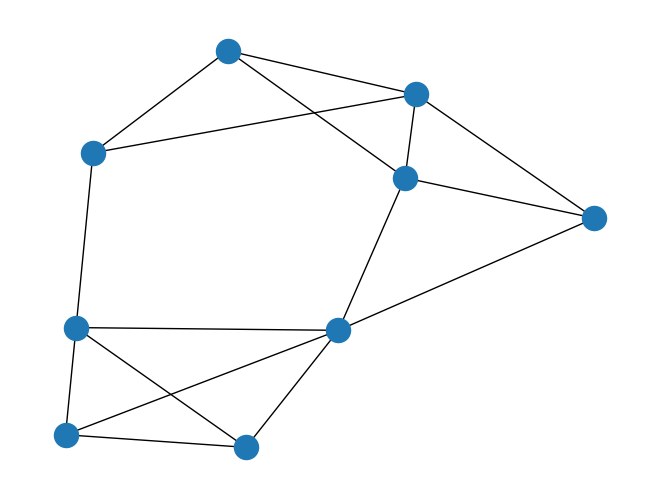

In [177]:
G_core = nx.k_core(G, k= None)
nx.draw(G_core)